In this analysis, Global_Terror_Data is used which the raw data is provided by Mr. Colakoglu via link below
https://www.kaggle.com/omercolakoglu/global-terrorism-database-turkish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("Global_Terror_Data3.xlsx")

In [3]:
df.head()

,id,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,weapdetail,nkill,nwound,nwoundus,ransom,CITY_LATITUDE,CITY_LONGITUDE,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,1,200000000000,1996,3,28,69,France,8,Western Europe,Nord-Pas-de-Calais,...,Bilinmeyen Patlayıcı Türü,Patlayıcı,0.0,0.0,NaN,0.0,50.631368,3.065448,44.302692,5.956622
1,2,197000000000,1974,12,15,69,France,8,Western Europe,Paris,...,Bilinmeyen Patlayıcı Türü,Patlayıcı,0.0,0.0,NaN,0.0,48.847231,2.357168,44.302692,5.956622
2,3,200000000000,1998,3,7,6,Algeria,10,Middle East & North Africa,Algiers,...,NaN,NaN,NaN,NaN,NaN,NaN,36.751932,3.048778,36.222000,3.396180
3,4,201000000000,2014,5,28,147,Nigeria,11,Sub-Saharan Africa,Plateau,...,NaN,NaN,NaN,NaN,NaN,NaN,9.727778,8.835278,9.726631,10.146832
4,5,199000000000,1987,4,10,61,El Salvador,2,Central America & Caribbean,NaN,...,Otomatik silah,Otomatik ateşli silah,NaN,NaN,NaN,NaN,13.921389,-89.845000,13.722327,-88.928628


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170308 entries, 0 to 170307
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 170308 non-null  int64  
 1   eventid            170308 non-null  int64  
 2   iyear              170308 non-null  int64  
 3   imonth             170308 non-null  int64  
 4   iday               170308 non-null  int64  
 5   country            170308 non-null  int64  
 6   country_txt        170308 non-null  object 
 7   region             170308 non-null  int64  
 8   region_txt         170308 non-null  object 
 9   provstate          155808 non-null  object 
 10  city               169862 non-null  object 
 11  multiple           144537 non-null  float64
 12  success            144537 non-null  float64
 13  suicide            144537 non-null  float64
 14  attacktype1        144537 non-null  float64
 15  attacktype1_txt    144537 non-null  object 
 16  ta

The dataset has 17308 entries with 38 columns

In [8]:
df.isna().sum()


id                        0
eventid                   0
iyear                     0
imonth                    0
iday                      0
country                   0
country_txt               0
region                    0
region_txt                0
provstate             14500
city                    446
multiple              25771
success               25771
suicide               25771
attacktype1           25771
attacktype1_txt       25771
targtype1             25771
targtype1_txt         25771
targsubtype1          34026
targsubtype1_txt      34026
corp1                 68018
target1               26441
natlty1               27117
natlty1_txt           27117
gname                 25985
weaptype1             30329
weaptype1_txt         30329
weapsubtype1          46008
weapsubtype1_txt      46008
weapdetail            71841
nkill                 40985
nwound                44995
nwoundus              95028
ransom               101191
CITY_LATITUDE          2457
CITY_LONGITUDE      

when we look at null values. It is obvious to see there are null value density on some columns.


For now I will keep these values not to loose other related values.


now I want to add GDP per capita info to this dataset to see if there is a relatioship between attacks and economy.


In [80]:
df2=pd.read_csv("GDP.csv")


In [98]:
df2.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


Now I would like to check if country names are same in both dataframes

In [15]:
my_list=[]
for i in df2['Country ']:
    if df.country_txt.str.contains(i).any():
        my_list.append(i)
        

C:\Users\CASPER\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [8]:
my_list

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Cameroon',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Croatia',
 'Haiti',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iraq',
 'Iceland',
 'Israel',
 'Italy',
 'Jamaica',
 'Jordan',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'C

These countries are same in both df

In [16]:
my_list2 = []
for i in df.country_txt:
    if i not in my_list and i not in my_list2 :

          my_list2.append(i)
my_list2

['Iran',
 'Egypt',
 'Russia',
 'Yemen',
 'Democratic Republic of the Congo',
 'West Bank and Gaza Strip',
 'Venezuela',
 'Cuba',
 'Syria',
 'West Germany (FRG)',
 'South Korea',
 'Republic of the Congo',
 'Kyrgyzstan',
 'Rhodesia',
 'Yugoslavia',
 'Macau',
 'Macedonia',
 'Bosnia-Herzegovina',
 'Swaziland',
 'Bahamas',
 'South Vietnam',
 'Laos',
 'Ivory Coast',
 'Zaire',
 'Hong Kong',
 'Czechoslovakia',
 'Soviet Union',
 'Taiwan',
 'East Timor',
 'South Yemen',
 'East Germany (GDR)',
 "People's Republic of the Congo",
 'Martinique',
 'Guadeloupe',
 'Western Sahara',
 'North Yemen',
 'French Guiana',
 'Gambia',
 'Vatican City',
 'Serbia-Montenegro',
 'Falkland Islands',
 'New Hebrides',
 'North Korea',
 'Brunei',
 'International',
 'Andorra',
 'Wallis and Futuna']

these are the countries that i will lost when i merge dataframes

In [20]:
df3 = df.merge(df2, how="inner",left_on='country_txt', right_on="Country ")

In [ ]:
now i have a dataset including terrorist attacks per countries and gdp values by years.

In [21]:
df3.head()

,id,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,200000000000,1996,3,28,69,France,8,Western Europe,Nord-Pas-de-Calais,...,35900.04557,37440.63863,37679.12178,39523.85395,40141.58548,40833.24207,42047.28724,44255.94164,45342.39574,NaN
1,2,197000000000,1974,12,15,69,France,8,Western Europe,Paris,...,35900.04557,37440.63863,37679.12178,39523.85395,40141.58548,40833.24207,42047.28724,44255.94164,45342.39574,NaN
2,15,198000000000,1981,5,5,69,France,8,Western Europe,Haute-Garonne,...,35900.04557,37440.63863,37679.12178,39523.85395,40141.58548,40833.24207,42047.28724,44255.94164,45342.39574,NaN
3,19,198000000000,1975,7,26,69,France,8,Western Europe,Paris,...,35900.04557,37440.63863,37679.12178,39523.85395,40141.58548,40833.24207,42047.28724,44255.94164,45342.39574,NaN
4,21,200000000000,1996,1,8,69,France,8,Western Europe,Corsica,...,35900.04557,37440.63863,37679.12178,39523.85395,40141.58548,40833.24207,42047.28724,44255.94164,45342.39574,NaN


In [ ]:
now i have a dataset including terrorist attacks per countries and gdp values by years.

In [ ]:
Since the last meaningful gdp values are in 2018 column, I will use this column for data analysis and visualisation.

In [22]:
df3["2018"].describe()

count    151736.000000
mean      16544.267557
std       14303.586126
min         744.182072
25%        5990.850432
50%       14418.070670
75%       17435.853930
max      126898.425900
Name: 2018, dtype: float64

I can use this info to categorise gdp values to make visualisation easier.

In [23]:

bins = [ 744.182072, 5990.850432,  14418.070670, 17435.853930, 126898.425900, np.inf]
names = ['very poor', 'poor', 'normal', 'rich', 'very rich']

df3["gdp_cat"] = pd.cut(df3['2018'], bins, labels=names)


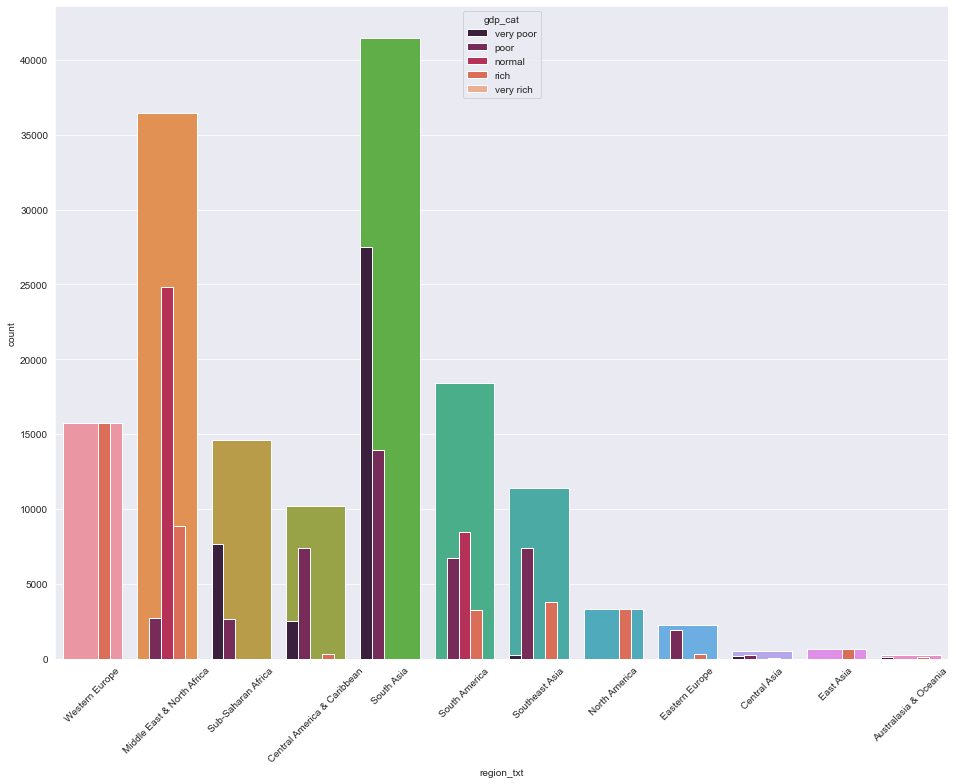

In [24]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(16,12))
sns.countplot(x= df3.region_txt)
sns.countplot(x=df3.region_txt,hue=df3.gdp_cat,palette="rocket")
plt.xticks(rotation=45);

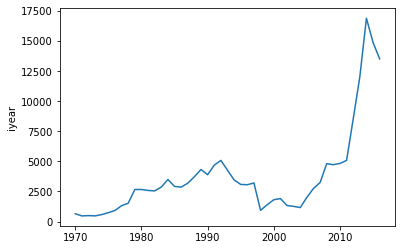

In [10]:
sns.lineplot(x= df.iyear.value_counts().index, y= df.iyear.value_counts())
plt.ylabel = ("year");

<AxesSubplot:ylabel='iyear'>

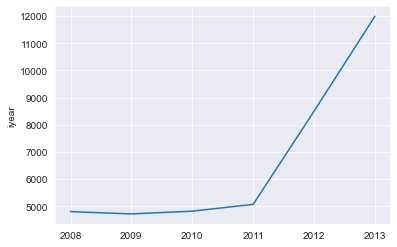

In [12]:
list_years= [2008,2009,2010,2011,2012,2013]
dfyear = df[df.iyear.isin(list_years)]['iyear']
sns.lineplot(x= dfyear.value_counts().index, y=  dfyear.value_counts() )


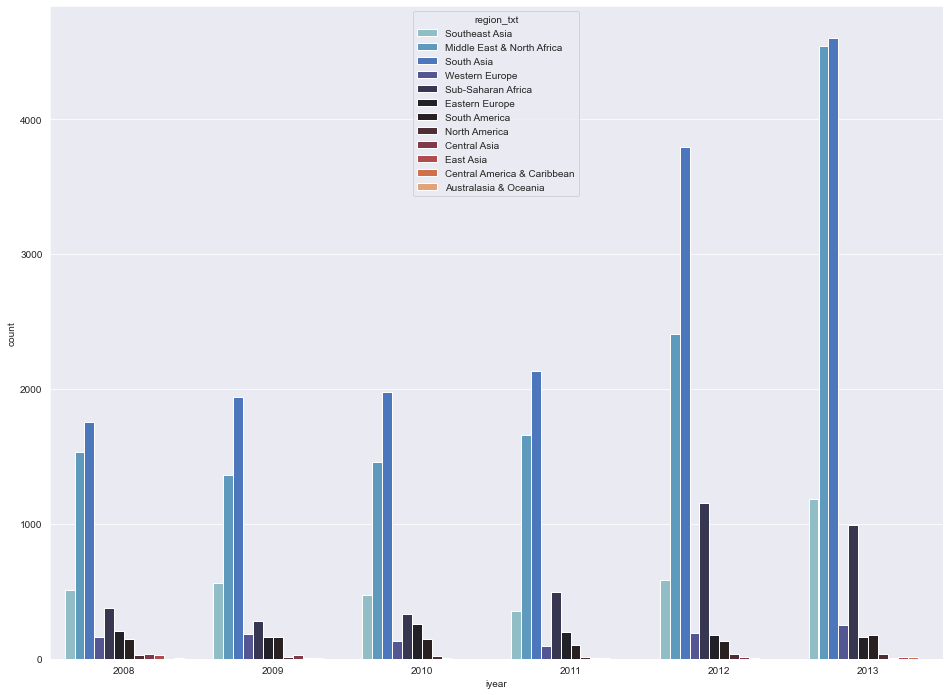

In [26]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(16,12))
dfyear_attack = df[df.iyear.isin(list_years)]
sns.countplot(x = dfyear_attack.iyear, hue = dfyear_attack.region_txt, palette="icefire");



In [18]:
df[df.iyear.isin(list_years)]['iyear'].value_counts(sort="Ascending")

2013    11994
2012     8499
2011     5071
2010     4820
2008     4803
2009     4719
Name: iyear, dtype: int64

In [45]:
df_num_attacks = pd.DataFrame(data = df.country_txt.value_counts(),index=df.country_txt.value_counts().index).reset_index().rename({"index": "country_txt", "country_txt":"num_attacks"}, axis=1)
df_num_attacks.head()


,country_txt,num_attacks
0,Iraq,22129
1,Pakistan,13634
2,Afghanistan,11306
3,India,10978
4,Colombia,8163


In [46]:
df_coord = df[["country_txt","COUNTRY_LATITUDE", "COUNTRY_LONGITUDE"]].drop_duplicates()
df_coord.head()

,country_txt,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,France,44.302692,5.956622
2,Algeria,36.222000,3.396180
3,Nigeria,9.726631,10.146832
4,El Salvador,13.722327,-88.928628
5,Iran,33.834858,51.541855


In [47]:
df_geo = df_num_attacks.merge(df_coord,how="inner", on="country_txt")

df_geo.head()


,country_txt,num_attacks,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Iraq,22129,33.975018,44.112054
1,Pakistan,13634,30.466443,69.394667
2,Afghanistan,11306,33.827390,67.163658
3,India,10978,25.976377,82.795902
4,Colombia,8163,5.594356,-74.799742


In [48]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [49]:
import plotly.express as px

In [52]:

fig = px.scatter_geo(df_geo, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE", color="country_txt",
                     hover_name="country_txt", size="num_attacks",
                     projection="natural earth")
fig.show()

In [78]:
fig = px.choropleth(df_geo , locations = 'country_txt', locationmode = 'country names', color = "num_attacks"
                        ,color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(title_text = 'Global Terror Attacks')
fig.show()


In [37]:
df80s = df3[df3["iyear"].isin([1989,1990,1991])]["country_txt"].value_counts().reset_index().merge(df_coord,how="inner", left_on="index", right_on="country_txt")
df80s.head()


,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Peru,1781,Peru,-11.979408,-75.899617
1,Colombia,1261,Colombia,5.594356,-74.799742
2,El Salvador,1040,El Salvador,13.722327,-88.928628
3,India,1012,India,25.976377,82.795902
4,Sri Lanka,766,Sri Lanka,8.007748,80.682718


In [68]:
dfstb = df3[df3["iyear"].isin([2009,2010])]["country_txt"].value_counts().reset_index().merge(df_coord,how="inner", left_on="index", right_on="country_txt")
dfstb.head()


,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Iraq,2315,Iraq,33.975018,44.112054
1,Pakistan,1380,Pakistan,30.466443,69.394667
2,India,1333,India,25.976377,82.795902
3,Afghanistan,1043,Afghanistan,33.827390,67.163658
4,Thailand,551,Thailand,7.381657,101.317728


In [69]:
dfinc = df3[df3["iyear"].isin([2011,2012])]["country_txt"].value_counts().reset_index().merge(df_coord,how="inner", left_on="index", right_on="country_txt")
dfinc.head()


,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Iraq,2745,Iraq,33.975018,44.112054
1,Pakistan,2664,Pakistan,30.466443,69.394667
2,Afghanistan,1889,Afghanistan,33.827390,67.163658
3,India,1255,India,25.976377,82.795902
4,Nigeria,791,Nigeria,9.726631,10.146832


In [55]:
df90s = df3[df3["iyear"].isin([1991,1992])]["country_txt"].value_counts().reset_index().merge(df_coord,how="inner", left_on="index", right_on="country_txt")
df90s.head()


,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Peru,1039,Peru,-11.979408,-75.899617
1,Colombia,943,Colombia,5.594356,-74.799742
2,Turkey,807,Turkey,38.988434,36.297783
3,India,576,India,25.976377,82.795902
4,United Kingdom,536,United Kingdom,54.251269,-5.592979


In [59]:
dfdesc = df3[df3["iyear"].isin([1992,1993])]["country_txt"].value_counts().reset_index().merge(df_coord,how="inner", left_on="index", right_on="country_txt")
dfdesc.head()


,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE
0,Colombia,523,Colombia,5.594356,-74.799742
1,Turkey,514,Turkey,38.988434,36.297783
2,Peru,382,Peru,-11.979408,-75.899617
3,United Kingdom,274,United Kingdom,54.251269,-5.592979
4,South Africa,271,South Africa,-28.367722,27.808429


In [56]:

fig = px.scatter_geo(df80s, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE", color="country_txt_y",
                     hover_name="country_txt_y", size="country_txt_x",
                     projection="natural earth")
fig.show()

In [40]:

fig = px.scatter_geo(df90s, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE", color="country_txt_y",
                     hover_name="country_txt_y", size="country_txt_x",
                     projection="natural earth")
fig.show()

In [131]:
dfdif = df80s
dfdif["difference"] =df90s["country_txt_x"]-df80s["country_txt_x"]
dfdif = dfdif[dfdif["difference"]>0]

In [78]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

px.scatter_geo(dfdif, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE", color="difference",
                     hover_name="country_txt_y", size="difference",
                     projection="natural earth")
fig.show()

In [132]:

fig = go.Figure(data=go.Choropleth(
    locations = dfdif['country_txt_y'],
     locationmode='country names',
    z = dfdif['difference'],
    text = dfdif['difference'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'difference',
))

fig.update_layout(
    title_text='2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

In [135]:
dfdif[dfdif["country_txt_y"]=="Turkey"]

,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE,rate,difference


In [42]:
df_num_attacks_1991 = pd.DataFrame(data = df[df["iyear"]==1991].country_txt.value_counts(),index=df.country_txt.value_counts().index).reset_index()
df_num_attacks_1991.head()


,index,country_txt
0,Iraq,3.0
1,Pakistan,150.0
2,Afghanistan,30.0
3,India,339.0
4,Colombia,420.0


In [46]:

fig = px.density_mapbox(df_geo, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE",  z='country_txt_x', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-watercolor")
fig.show()

In [102]:

dfdif2 = df80s
dfdif2["difference"] =dfdesc["country_txt_x"]-df80s["country_txt_x"]
dfdif2 = dfdif2[dfdif2["difference"]<0]


In [103]:

dfdif3 = df80s
dfdif3["difference"] =dfinc["country_txt_x"]-dfstb["country_txt_x"]
dfdif3 = dfdif3[dfdif3["difference"]>0]


In [104]:
dfdif3.head()

,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE,rate,difference
0,Peru,1781,Peru,-11.979408,-75.899617,-0.416620,430.0
1,Colombia,1261,Colombia,5.594356,-74.799742,-0.252181,1284.0
2,El Salvador,1040,El Salvador,13.722327,-88.928628,-0.224038,556.0
3,India,1012,India,25.976377,82.795902,-0.430830,212.0
4,Sri Lanka,766,Sri Lanka,8.007748,80.682718,-0.300261,240.0


In [105]:

fig = px.scatter_geo(dfdif3, lat = "COUNTRY_LATITUDE", lon= "COUNTRY_LONGITUDE", color="difference",
                     hover_name="country_txt_y", size="difference",
                     projection="natural earth")
fig.show()

In [137]:

fig = go.Figure(data=go.Choropleth(
    locations = dfdif3['country_txt_y'],
     locationmode='country names',
    z = dfdif3['difference'],
    text = dfdif3['difference'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'difference',
))

fig.update_layout(
    title_text='2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

In [97]:
dfIraq = dfIraq.iyear.value_counts().reset_index()


In [107]:
dfIraq.head()

,index,iyear
0,2014,3926
1,2016,3356
2,2013,2849
3,2015,2744
4,2012,1437


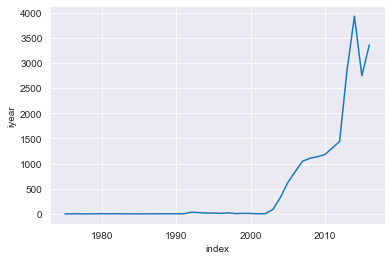

In [108]:
sns.lineplot(x = dfIraq["index"], y = dfIraq.iyear);

In [110]:
dfterg = df.country_txt.value_counts().reset_index()

In [112]:
dftergd = dfterg.merge(df_coord,how="inner", left_on="index", right_on="country_txt")

In [116]:
dftergd.dropna(inplace=True)

In [118]:
dftergd.head(50)

,index,country_txt_x,country_txt_y,COUNTRY_LATITUDE,COUNTRY_LONGITUDE,2018
0,Iraq,22129,Iraq,33.975018,44.112054,17435.853930
1,Pakistan,13634,Pakistan,30.466443,69.394667,5567.055608
2,Afghanistan,11306,Afghanistan,33.827390,67.163658,1955.006208
3,India,10978,India,25.976377,82.795902,7762.881770
4,Colombia,8163,Colombia,5.594356,-74.799742,15012.930270
5,Philippines,6212,Philippines,9.873664,123.245660,8951.085654
6,Peru,6069,Peru,-11.979408,-75.899617,14418.070670
7,El Salvador,5320,El Salvador,13.722327,-88.928628,8331.804142
8,United Kingdom,5098,United Kingdom,54.251269,-5.592979,45973.573500
9,Turkey,4106,Turkey,38.988434,36.297783,28068.859410


<AxesSubplot:xlabel='country_txt_x', ylabel='2018'>

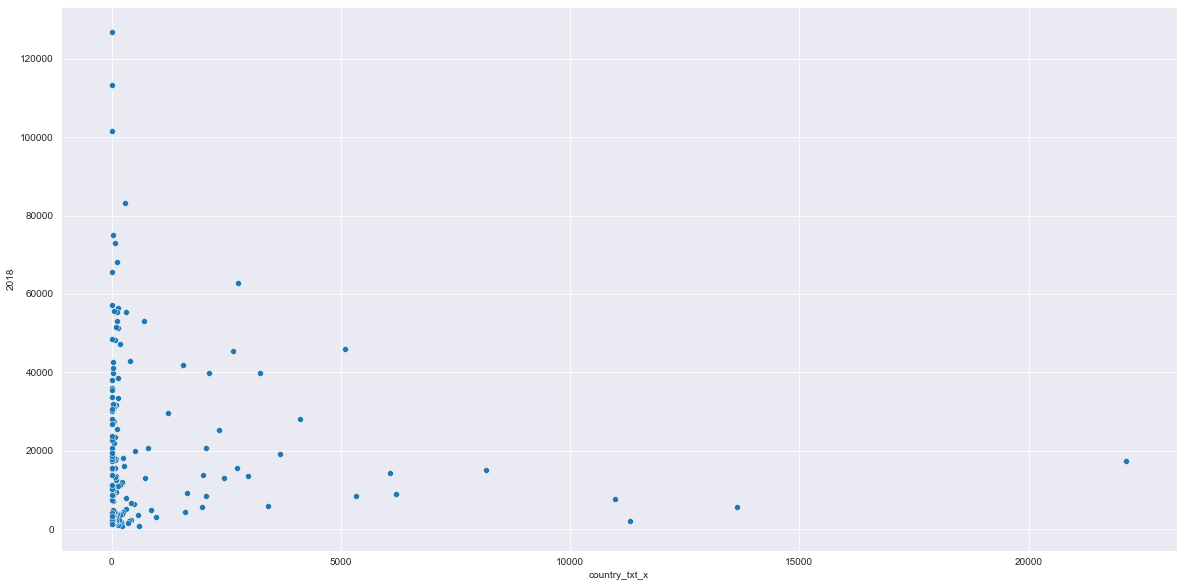

In [128]:
fig, ax = plt.subplots(figsize= (20,10))
sns.scatterplot(x = dftergd.country_txt_x, y = dftergd["2018"])

In [136]:
dftergd["2018"].describe()

count       152.000000
mean      22271.742930
std       22739.482640
min         744.182072
25%        5045.986799
50%       15160.326105
75%       31447.990965
max      126898.425900
Name: 2018, dtype: float64

In [143]:
nato_members = {"ALBANIA":2009,
"Belgium": 1949,
"BULGARIA": 2004,
"CANADA" : 1949,
"CROATIA" : 2009,
"CZECH REPUBLIC" :1999,
"DENMARK":1949,
"ESTONIA":2004,
"FRANCE" : 1949,
"GERMANY" :1955,
"GREECE" :1952,
"HUNGARY" :1999,
"ICELAND" :1949,
"ITALY" :1949,
"LATVIA" :2004,
"LITHUANIA" :2004,
"LUXEMBOURG" :1949,
"MONTENEGRO" :2017,
"NETHERLANDS" :1949,
"NORTH MACEDONIA" :2020,
"NORWAY" :1949,
"POLAND" :1999,
"PORTUGAL" :1949,
"ROMANIA" :2004,
"SLOVAKIA" :2004,
"SLOVENIA" :2004,
"SPAIN" :1982,
"TURKEY" :1952,
"UNITED KINGDOM":1949,
"UNITED STATES" :1949}

In [151]:
nato_members2 = {}
for i in nato_members.keys():
   nato_members2[i.title()]=nato_members[i]

In [152]:
nato_members2

{'Albania': 2009,
 'Belgium': 1949,
 'Bulgaria': 2004,
 'Canada': 1949,
 'Croatia': 2009,
 'Czech Republic': 1999,
 'Denmark': 1949,
 'Estonia': 2004,
 'France': 1949,
 'Germany': 1955,
 'Greece': 1952,
 'Hungary': 1999,
 'Iceland': 1949,
 'Italy': 1949,
 'Latvia': 2004,
 'Lithuania': 2004,
 'Luxembourg': 1949,
 'Montenegro': 2017,
 'Netherlands': 1949,
 'North Macedonia': 2020,
 'Norway': 1949,
 'Poland': 1999,
 'Portugal': 1949,
 'Romania': 2004,
 'Slovakia': 2004,
 'Slovenia': 2004,
 'Spain': 1982,
 'Turkey': 1952,
 'United Kingdom': 1949,
 'United States': 1949}

In [164]:
dfNato

,0
Albania,2009
Belgium,1949
Bulgaria,2004
Canada,1949
Croatia,2009
Czech Republic,1999
Denmark,1949
Estonia,2004
France,1949
Germany,1955


In [165]:
dfNATO = df3.country_txt.value_counts().reset_index()

In [172]:
nato_col = {}
for i in df3.country_txt:
    if i in nato_members2.keys():
        nato_col[i]= "member"
    else :
        nato_col[i] = "not member"    

In [173]:
nato_col

{'France': 'member',
 'Algeria': 'not member',
 'Nigeria': 'not member',
 'El Salvador': 'not member',
 'Libya': 'not member',
 'South Africa': 'not member',
 'Sri Lanka': 'not member',
 'Iraq': 'not member',
 'Guatemala': 'not member',
 'Israel': 'not member',
 'Italy': 'member',
 'Peru': 'not member',
 'Thailand': 'not member',
 'Afghanistan': 'not member',
 'Philippines': 'not member',
 'Pakistan': 'not member',
 'Lebanon': 'not member',
 'Colombia': 'not member',
 'Senegal': 'not member',
 'India': 'not member',
 'Mali': 'not member',
 'Cameroon': 'not member',
 'Sudan': 'not member',
 'Mexico': 'not member',
 'Angola': 'not member',
 'United Kingdom': 'member',
 'Argentina': 'not member',
 'South Sudan': 'not member',
 'Nicaragua': 'not member',
 'Ukraine': 'not member',
 'Turkey': 'member',
 'Azerbaijan': 'not member',
 'Somalia': 'not member',
 'Cyprus': 'not member',
 'Indonesia': 'not member',
 'Bangladesh': 'not member',
 'Georgia': 'not member',
 'Nepal': 'not member',
 'Bur

In [174]:
dfnato = df3.country_txt.value_counts().reset_index()

In [178]:
dfNato = pd.DataFrame.from_dict(nato_col , orient="index").reset_index()

In [176]:
dfnato.head()

,index,country_txt
0,Iraq,22129
1,Pakistan,13634
2,Afghanistan,11306
3,India,10978
4,Colombia,8163


In [179]:
dfNato.head()

,index,0
0,France,member
1,Algeria,not member
2,Nigeria,not member
3,El Salvador,not member
4,Libya,not member


In [180]:
dffin = dfnato.merge(dfNato, how = "inner", left_on= dfnato["index"], right_on=dfNato["index"])

In [181]:
dffin.head()

,key_0,index_x,country_txt,index_y,0
0,Iraq,Iraq,22129,Iraq,not member
1,Pakistan,Pakistan,13634,Pakistan,not member
2,Afghanistan,Afghanistan,11306,Afghanistan,not member
3,India,India,10978,India,not member
4,Colombia,Colombia,8163,Colombia,not member


In [195]:
dffin[0]

0      not member
1      not member
2      not member
3      not member
4      not member
          ...    
153    not member
154    not member
155    not member
156    not member
157    not member
Name: 0, Length: 158, dtype: object

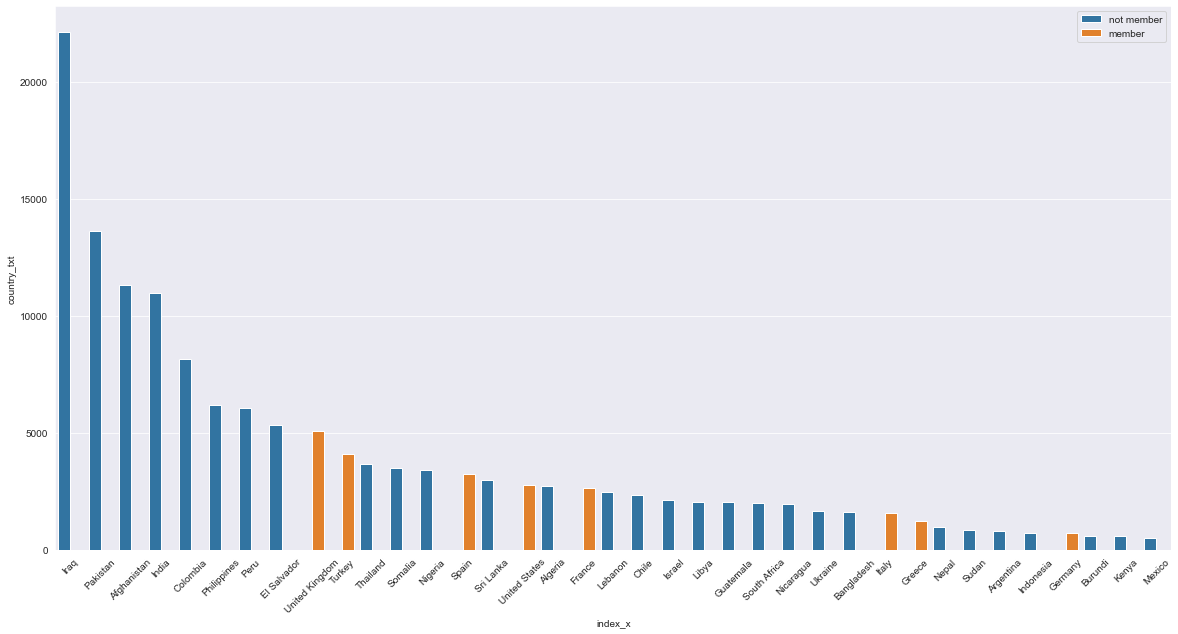

In [217]:
fig, ax = plt.subplots(figsize= (20,10))
dffin2 =x = dffin[dffin["country_txt"]>500]
sns.barplot(x = dffin2["index_x"], y = dffin2["country_txt"], hue=dffin2[0])
plt.xticks(rotation = 45);

 Nato  has 30 members. Since there are only 8 NATO members on the top 37 attacked countries, it can show us that NATO has a succesful counter-terrorism policy.

In [213]:
dffin[dffin["country_txt"]>500]

,key_0,index_x,country_txt,index_y,0
0,Iraq,Iraq,22129,Iraq,not member
1,Pakistan,Pakistan,13634,Pakistan,not member
2,Afghanistan,Afghanistan,11306,Afghanistan,not member
3,India,India,10978,India,not member
4,Colombia,Colombia,8163,Colombia,not member
5,Philippines,Philippines,6212,Philippines,not member
6,Peru,Peru,6069,Peru,not member
7,El Salvador,El Salvador,5320,El Salvador,not member
8,United Kingdom,United Kingdom,5098,United Kingdom,member
9,Turkey,Turkey,4106,Turkey,member


In [209]:

px.bar(x = dffin["index_x"], y = dffin.country_txt)

